In [1]:
import itertools
import json
import networkx as nx
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from shapely.geometry import Polygon, Point
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

R = 6373.0

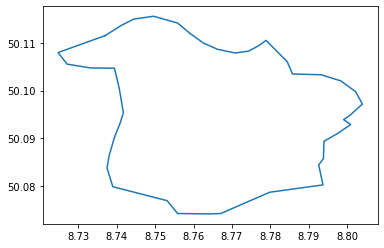

In [2]:
# Load city boundaries manually created by Google MyMaps
of_boundaries = json.load(open("of_boundaries.json", "r"))

poly = Polygon(of_boundaries)
plt.plot(*poly.exterior.xy)
plt.show()

In [3]:
def plot_bound_point(point: tuple = None):
    x,y = zip(*of_boundaries)
    for i in range(0, len(x)):
        plt.plot(x[i:i+2], y[i:i+2], 'ro-')

    plt.plot(point[0], point[1], 'bo')
    
    plt.show()

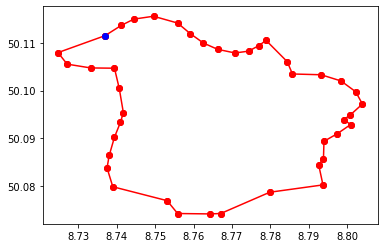

In [4]:
plot_bound_point([8.7369833, 50.1115023])

In [5]:
tree = ET.parse('map.xml')
root = tree.getroot()

In [6]:
def pip(p):
    poly = Polygon(of_boundaries)
    point = Point(p)
    plt.plot(*poly.exterior.xy)
    return point.within(poly)

In [7]:
nodes = dict()
ways = set()
relations = set()

for child in root:
    #print(child.tag, child.attrib)
    if child.tag == "node":
        nodes[child.get("id")] = child
        
    elif child.tag == "way":
        ways |= set([child])
        
    elif child.tag == "relation":
        relations |= set([child])
        
        
print(f"Number of nodes: {len(nodes)}")
print(f"Number of ways: {len(ways)}")
print(f"Number of relations: {len(relations)}")


Number of nodes: 164498
Number of ways: 27933
Number of relations: 587


cycleway
path
service
path
footway
track
cycleway
path
path
service
path
track
steps
secondary
service
track
steps
path
secondary
service
service
path
footway
primary
residential
footway
platform
footway
cycleway
footway
service
service
footway
primary
steps
residential
pedestrian
steps
residential
steps
residential
track
footway
footway
path
service
service
track
service
footway
path
service
service
service
footway
service
service
service
service
track
service
service
service
path
service
footway
footway
service
service
path
service
service
footway
secondary
secondary
footway
service
service
footway
secondary
service
footway
secondary
service
service
service
secondary
service
pedestrian
footway
primary
pedestrian
service
residential
pedestrian
service
service
service
footway
footway
service
footway
primary
service
primary
service
footway
residential
tertiary
footway
living_street
footway
footway
footway
living_street
residential
motorway
residential
footway
footway
footway
footway
res

footway
footway
service
footway
service
steps
footway
secondary_link
pedestrian
service
pedestrian
residential
footway
footway
pedestrian
footway
footway
footway
residential
path
residential
service
steps
service
path
residential
service
steps
path
footway
service
cycleway
footway
service
tertiary
residential
footway
footway
footway
footway
footway
footway
service
footway
footway
service
residential
living_street
footway
footway
residential
path
path
residential
residential
footway
footway
service
primary
footway
residential
residential
footway
residential
residential
residential
footway
footway
primary
residential
residential
footway
residential
path
residential
track
footway
track
steps
service
primary
track
service
service
secondary
primary
service
primary
service
residential
service
track
path
footway
service
primary
service
footway
footway
footway
service
service
primary
service
residential
footway
service
service
footway
footway
residential
track
service
tertiary
track
service
re

residential
footway
footway
service
secondary
service
residential
footway
track
service
service
tertiary
service
service
footway
footway
footway
tertiary
footway
footway
secondary
residential
service
residential
footway
track
residential
residential
primary
footway
residential
service
steps
residential
service
footway
residential
footway
residential
steps
primary
footway
footway
residential
footway
residential
footway
footway
footway
secondary
service
service
service
pedestrian
footway
service
service
motorway
path
service
path
service
service
residential
residential
path
path
residential
path
path
service
residential
tertiary
unclassified
residential
secondary
footway
residential
secondary
secondary
footway
secondary
pedestrian
service
residential
residential
secondary
living_street
service
footway
footway
living_street
footway
residential
tertiary
service
residential
footway
residential
track
residential
path
track
residential
secondary
service
footway
secondary
rest_area
footway
foo

footway
path
residential
footway
tertiary_link
footway
footway
footway
residential
residential
path
tertiary_link
service
secondary
footway
residential
living_street
footway
primary
residential
living_street
tertiary
path
living_street
residential
tertiary
steps
residential
footway
service
service
residential
footway
service
footway
footway
residential
footway
footway
service
service
tertiary
primary
service
primary
service
service
residential
service
service
primary
footway
footway
service
residential
footway
footway
service
footway
footway
footway
service
footway
footway
steps
path
footway
footway
footway
footway
track
steps
footway
service
service
platform
service
service
service
service
service
footway
motorway_link
service
service
service
primary
footway
service
footway
service
service
residential
service
service
tertiary
residential
service
residential
footway
service
residential
service
service
footway
tertiary
tertiary
service
footway
service
residential
primary
residential
ser

steps
steps
secondary_link
residential
footway
footway
residential
living_street
cycleway
service
steps
footway
footway
motorway
footway
steps
footway
service
secondary_link
steps
steps
footway
footway
footway
footway
service
residential
service
service
service
residential
service
service
footway
service
footway
service
footway
service
path
service
service
service
service
residential
service
service
service
footway
path
residential
footway
primary
service
footway
service
residential
residential
track
service
footway
service
service
footway
track
service
track
track
service
footway
residential
service
footway
service
footway
secondary
footway
track
service
residential
footway
footway
path
primary
residential
path
residential
track
track
footway
steps
track
primary
service
residential
footway
footway
service
secondary
service
footway
residential
residential
footway
footway
residential
service
steps
service
service
footway
cycleway
footway
service
service
service
secondary
steps
footway
f

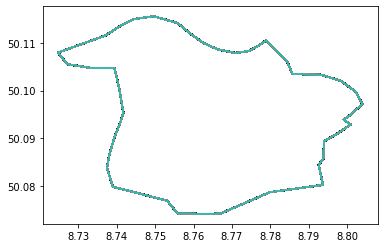

In [8]:
paths = []
restriced_ways = ["track", "path"]
checked_nodes = dict()

for way in ways:
    first_node = None
    last_node = None
    highway = None
    name = None
    
    tmp_paths = []
    
    for node in way:
        if node.tag == "nd":
            
            node_ref = node.get("ref")
            node_obj = nodes[node_ref]
            node_lat = float(node_obj.get("lat"))
            node_lon = float(node_obj.get("lon"))
            
            in_of = pip((node_lon, node_lat))
            if not in_of:
                continue
            
            if node.get("ref") not in checked_nodes:
                checked_nodes[node.get("ref")] = 1
            else:
                checked_nodes[node.get("ref")] += 1
            
            if first_node == None:
                first_node = node
                last_node = node
                continue
                
            first_node = node
            
            if not last_node is first_node:
                tmp_paths.append([first_node, last_node])
                
            last_node = node
            
        elif node.tag == "tag":
            if node.get("k") == "name":
                name = node.get("v")
            
            elif node.get("k") == "highway":
                highway = node.get("v")
                print(highway)
                if highway in restriced_ways:
                    highway = None
    
    if highway is not None and name is not None:
        for tmp_path in tmp_paths:
            first_node, last_node = tmp_path
            
            f_id = first_node.get("ref")
            l_id = last_node.get("ref")
            
            paths.append([first_node, last_node, name, highway])


In [9]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [10]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        # g.add_edge(k[0], k[1], {'distance': v, 'weight': wt_i})  # deprecated after NX 1.11 
        g.add_edge(k[0], k[1], **{'distance': v, 'weight': wt_i})  
    return g

In [11]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'trail': 'augmented'}
                           # attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                           #            'trail': 'augmented'}  # deprecated after 1.11
                          )
    return graph_aug

In [12]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_path(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if not "trail" in edge_data[0]: # or edge_data[0]['trail'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))
                                      
    return euler_circuit

In [13]:
def distance(lat1, lon1, lat2, lon2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [14]:
with open("paths.txt", "w") as pout:
    pout.write("start\tend\tlat\tlon\tlat\tlon\tname\n")
    
    with open("nodes.txt", "w") as nout:
        for path in paths:
            first_node, last_node, name, highway = path
            f_id = first_node.get("ref")
            l_id = last_node.get("ref")
            
            f_lat = float(nodes[f_id].get("lat")) * -100000
            f_lon = float(nodes[f_id].get("lon")) * 100000
            l_lat = float(nodes[l_id].get("lat")) * -100000
            l_lon = float(nodes[l_id].get("lon")) * 100000
            
            nout.write(f"{f_id};{f_lat};{f_lon}\n")
            nout.write(f"{l_id};{l_lat};{l_lon}\n")
            
            pout.write(f"{f_id}\t{l_id}\t{f_lat}\t{f_lon}\t{l_lat}\t{l_lon}\t{name}\n")

In [15]:
G = nx.Graph()
for path in paths:
    first_node, last_node, name, highway = path
    f_id = first_node.get("ref")
    l_id = last_node.get("ref")
    
    f_lat = float(nodes[f_id].get("lat"))
    f_lon = float(nodes[f_id].get("lon"))
    l_lat = float(nodes[l_id].get("lat"))
    l_lon = float(nodes[l_id].get("lon"))
    
    dist = distance(f_lat, f_lon, l_lat, l_lon)
    
    f_lat = f_lat * -100000
    f_lon = f_lon * 100000
    l_lat = l_lat * -100000
    l_lon = l_lon * 100000
    
    G.add_node(f_id, lat=f_lat, lon=f_lon)
    G.add_node(l_id, lat=l_lat, lon=l_lon)
    G.add_edge(f_id, l_id, name=name, distance=dist)

In [16]:
G.number_of_edges()

6913

In [17]:
max_cc = max([len(l) for l in list(nx.connected_components(G))])
print("Max Size Connected Component: ", max_cc)
for cc in list(nx.connected_components(G)):
    size = len(cc)
    if not size == max_cc:
        for node in cc:
            G.remove_node(node)
        print(f"Removed {size}")

Max Size Connected Component:  6260
Removed 36
Removed 35
Removed 3
Removed 3
Removed 21
Removed 20
Removed 6
Removed 5
Removed 5
Removed 8
Removed 10
Removed 3


In [18]:
found_2deg = True
while found_2deg:
    found_2deg = False
    for node in G.nodes:
        neighbours = G[node]
        if len(neighbours) == 2:
            before, after = neighbours
            prev_edge = G[before][node]
            next_edge = G[node][after]
            
            prev_distance = prev_edge["distance"]
            next_distance = next_edge["distance"]
            new_distance = prev_distance + next_distance
            
            G.remove_edge(before, node)
            G.remove_edge(node, after)
            G.remove_node(node)
            G.add_edge(before, after, name=prev_edge["name"], distance=new_distance)
            found_2deg = True
            break       

In [19]:
with open("pathsx.txt", "w") as pout:
    pout.write("start\tend\tlat\tlon\tlat\tlon\tname\tdistance\n")
    for edge in G.edges:
        start, end = edge
        name = G[start][end]["name"]
        distance = G[start][end]["distance"]
        start_node = G.nodes[start]
        end_node = G.nodes[end]
        start_lat = start_node["lat"]
        start_lon = start_node["lon"]
        end_lat = end_node["lat"]
        end_lon = end_node["lon"]
        
        pout.write(f"{start}\t{end}\t{start_lat}\t{start_lon}\t{end_lat}\t{end_lon}\t{name}\t{distance}\n")
    

In [20]:
sum(nx.get_edge_attributes(G, "distance").values())

168.66684121280667

In [21]:
# https://brooksandrew.github.io/simpleblog/articles/intro-to-graph-optimization-solving-cpp/#intro-to-graph-optimization-with-networkx-in-python
nodes_odd_degree = [v for v, d in G.degree() if d % 2 == 1]
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(G.nodes())))

odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))
odd_node_pairs_shortest_paths = get_shortest_paths_distances(G, odd_node_pairs, 'distance')
print(dict(list(odd_node_pairs_shortest_paths.items())[0:10]))

Number of nodes of odd degree: 778
Number of total nodes: 1015
{('242705211', '82659807'): 0.030495226168955555, ('242705211', '3226974301'): 1.299603426252337, ('242705211', '60953734'): 0.8751093331821371, ('242705211', '60955350'): 1.0123246851242713, ('242705211', '1424096561'): 3.8256660326939023, ('242705211', '34042100'): 0.34837199799802965, ('242705211', '5521086444'): 4.0872700037519065, ('242705211', '5521086115'): 4.0026165453068145, ('242705211', '1837280986'): 4.12089203506761, ('242705211', '1835094359'): 4.1692435658259654}


In [22]:
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 778
Number of edges: 302253


In [23]:
# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 389


In [24]:
# Convert matching to list of deduped tuples
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes]))

# Counts
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))

# Preview of deduped matching
print(odd_matching)

Number of edges in matching (deduped): 389
[('36322034', '5648989253'), ('1832015465', '36452115'), ('270186542', '41368923'), ('271785586', '271785589'), ('2033676026', '409460259'), ('4217663387', '5648989249'), ('2033676282', '409459727'), ('1835094359', '5514723358'), ('38587773', '38588436'), ('1834786474', '495955323'), ('86060019', '86060023'), ('86058047', '86058051'), ('60955433', '60955434'), ('82656829', '86058045'), ('271785558', '271785559'), ('2551461513', '2551461521'), ('1822641856', '1836463892'), ('3424471486', '429358093'), ('34425505', '761140259'), ('409459908', '409460214'), ('2861923982', '2861923985'), ('526643', '526656'), ('1036364384', '457347045'), ('4514348757', '5648989248'), ('36752661', '36752662'), ('703989714', '703989776'), ('52321922', '53378842'), ('271785581', '868571081'), ('35339006', '60264009'), ('60953737', '82528619'), ('36753442', '38579032'), ('271785526', '271785529'), ('2018954669', '35243261'), ('1838239191', '34087295'), ('60268030', '6

In [25]:
# Create augmented graph: add the min weight matching edges to g
g_aug = add_augmenting_path_to_graph(G, odd_matching)

# Counts
print('Number of edges in original graph: {}'.format(len(G.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))
print(pd.value_counts([e[1] for e in g_aug.degree()]))

Number of edges in original graph: 1502
Number of edges in augmented graph: 1891
4    858
2    148
6      9
dtype: int64


In [26]:
naive_euler_path = list(nx.eulerian_path(g_aug, source='36321196'))
print('Length of eulerian path: {}'.format(len(naive_euler_path)))

Length of eulerian path: 1891


In [27]:
# Create the Eulerian circuit
euler_path = create_eulerian_circuit(g_aug, G, '36321196')

Filling in edges for augmented edge: ('36321512', '495955320')
Augmenting path: 36321512 => 3161228622 => 495955320
Augmenting path pairs: [('36321512', '3161228622'), ('3161228622', '495955320')]

Filling in edges for augmented edge: ('215325465', '36475981')
Augmenting path: 215325465 => 215366451 => 36475981
Augmenting path pairs: [('215325465', '215366451'), ('215366451', '36475981')]

Filling in edges for augmented edge: ('1838239191', '34087295')
Augmenting path: 1838239191 => 60268029 => 34087295
Augmenting path pairs: [('1838239191', '60268029'), ('60268029', '34087295')]

Filling in edges for augmented edge: ('60264911', '60264908')
Augmenting path: 60264911 => 35503729 => 60264908
Augmenting path pairs: [('60264911', '35503729'), ('35503729', '60264908')]

Filling in edges for augmented edge: ('3181433975', '35503730')
Augmenting path: 3181433975 => 35152699 => 35503730
Augmenting path pairs: [('3181433975', '35152699'), ('35152699', '35503730')]

Filling in edges for augment

In [28]:
# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_path[0:20]):
    print(i, edge)

0 ('36321196', '2118592187', {'name': 'Wilhelmsplatz', 'distance': 0.03909958412190206})
1 ('2118592187', '2118592186', {'name': 'Offenbacher Wochenmarkt', 'distance': 0.0626126718101002})
2 ('2118592186', '2118592187', {'name': 'Offenbacher Wochenmarkt', 'distance': 0.0626126718101002})
3 ('2118592187', '1863040827', {'name': 'Wilhelmsplatz', 'distance': 0.09455208054079794})
4 ('1863040827', '1863040842', {'name': 'Offenbacher Wochenmarkt', 'distance': 0.05792940333441247})
5 ('1863040842', '35339018', {'name': 'Wilhelmsplatz', 'distance': 0.026081513720990986})
6 ('35339018', '1863040842', {'name': 'Wilhelmsplatz', 'distance': 0.026081513720990986})
7 ('1863040842', '2118592186', {'name': 'Wilhelmsplatz', 'distance': 0.09962140103081446})
8 ('2118592186', '36321512', {'name': 'Wilhelmsplatz', 'distance': 0.03947913404368063})
9 ('36321512', '3161228622', {'name': 'Bleichstraße', 'distance': 0.09500531446327495})
10 ('3161228622', '495955320', {'name': 'Bleichstraße', 'distance': 0.0

In [29]:
# Computing some stats
total_mileage_of_circuit = sum([edge[2]['distance'] for edge in euler_path])
total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(G, 'distance').values())
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_path]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_path).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

# Printing stats
print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))
print('Percent of mileage retraced: {0:.2f}%\n'.format((1-total_mileage_of_circuit/total_mileage_on_orig_trail_map)*-100))

print('Number of edges in circuit: {}'.format(len(euler_path)))
print('Number of edges in original graph: {}'.format(len(G.edges())))
print('Number of nodes in original graph: {}\n'.format(len(G.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_path)-len(G.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')

print(edge_visits.to_string(index=False))

Mileage of circuit: 213.98
Mileage on original trail map: 168.67
Mileage retracing edges: 45.31
Percent of mileage retraced: 26.86%

Number of edges in circuit: 2024
Number of edges in original graph: 1502
Number of nodes in original graph: 1015

Number of edges traversed more than once: 522

Number of times visiting each node:
 n_visits  n_nodes
        1      148
        2      728
        3      136
        4        3

Number of times visiting each edge:
 n_visits  n_edges
        1      980
        2      522


In [48]:
euler_path_points = []
with open("euler.txt", "w") as euf:
    for edge in euler_path:
        start = edge[0]
        end = edge[1]
        data = edge[2]

        start_node = G.nodes[start]
        end_node = G.nodes[end]

        start_lat = -1 * round(float(start_node["lat"]), 2) / 100000
        start_lon = round(float(start_node["lon"]), 2) / 100000.0
        end_lat = -1 * round(float(end_node["lat"]), 2) / 100000
        end_lon = round(float(end_node["lon"]), 2) / 100000.0
        
        euf.write(f"{start_lat}\t{start_lon}\n")
        
        name = data["name"]
        distance = data["distance"]
        
        euler_path_points.append([start_lat, start_lon, distance, name])

In [59]:
print(len(euler_path_points))
for i in range(len(euler_path_points) - 5, len(euler_path_points)):
    print(i)
    euler_path_points[i]

2024
2019
2020
2021
2022
2023


In [49]:
BBox = (8.7286,   8.7963,      
         50.0743, 50.1151)

import plotly.express as px 
fig = px.scatter_mapbox(of_boundaries, lat=1, lon=0, zoom=12)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [86]:
import os
folder = "images_2"
if not os.path.exists(folder):
    os.mkdir(folder)
    
distance = 0

for i in range(2, len(euler_path_points)):
    print(i)
    points = euler_path_points[0:i]
    current_point = points[-1]
    
    distance += current_point[2]
    rounded_distance = '{:.3f}'.format(round(distance, 3)).zfill(7) + " km"
    
    print(rounded_distance)
    
    center = {"lat": current_point[0], "lon": current_point[1]}
    
    fig = px.line_mapbox(points, lat=0, lon=1, zoom=12)
    fig.update_layout(mapbox_style="open-street-map")
    
    # annotations=[
     #       go.layout.Annotation
     #   ]
    
    fig.add_annotation(
                text='Distanz:<br>'+rounded_distance,
                align='right',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.0,
                y=1.0,
                bordercolor='red',
                borderwidth=2,
                bgcolor="#f1f1f1",
            )
    
    # fig.show()
    count = str(i).zfill(5)
    fig.write_image(folder + "/fig" + count + ".png")
    del fig
    

print("ok")

2
000.063 km
3
000.125 km
4
000.220 km
5
000.278 km
6
000.304 km
7
000.330 km
8
000.429 km
9
000.469 km
10
000.564 km
11
000.630 km
12
000.667 km
13
000.822 km
14
000.977 km
15
001.026 km
16
001.137 km
17
001.157 km
18
001.235 km
19
001.285 km
20
001.361 km
21
001.401 km
22
001.441 km
23
001.463 km
24
001.483 km
25
001.524 km
26
001.699 km
27
001.822 km
28
001.839 km
29
001.856 km
30
001.874 km
31
001.891 km
32
001.909 km
33
002.152 km
34
002.324 km
35
002.499 km
36
002.674 km
37
002.741 km
38
002.808 km
39
002.965 km
40
003.043 km
41
003.120 km
42
003.169 km
43
003.188 km
44
003.376 km
45
003.515 km
46
003.760 km
47
003.865 km
48
003.947 km
49
004.028 km
50
004.141 km
51
004.254 km
52
004.399 km
53
004.492 km
54
004.663 km
55
004.795 km
56
004.926 km
57
005.090 km
58
005.213 km
59
005.401 km
60
005.649 km
61
005.958 km
62
005.969 km
63
005.980 km
64
006.135 km
65
006.169 km
66
006.253 km
67
006.453 km
68
006.579 km
69
006.702 km
70
006.795 km
71
006.944 km
72
007.073 km
73
007.219 km


556
055.795 km
557
055.907 km
558
056.082 km
559
056.101 km
560
056.171 km
561
056.248 km
562
056.360 km
563
056.520 km
564
056.533 km
565
056.569 km
566
056.605 km
567
056.719 km
568
056.850 km
569
056.981 km
570
057.123 km
571
057.173 km
572
057.195 km
573
057.239 km
574
057.283 km
575
057.349 km
576
057.413 km
577
057.477 km
578
057.634 km
579
057.836 km
580
058.060 km
581
058.105 km
582
058.151 km
583
058.321 km
584
058.446 km
585
058.608 km
586
058.776 km
587
058.844 km
588
058.903 km
589
058.962 km
590
059.069 km
591
059.213 km
592
059.371 km
593
059.457 km
594
059.571 km
595
059.650 km
596
059.729 km
597
059.851 km
598
059.911 km
599
060.036 km
600
060.162 km
601
060.290 km
602
060.492 km
603
060.539 km
604
060.599 km
605
060.639 km
606
060.679 km
607
060.751 km
608
060.830 km
609
060.903 km
610
060.985 km
611
061.067 km
612
061.125 km
613
061.184 km
614
061.357 km
615
061.550 km
616
061.722 km
617
061.751 km
618
061.779 km
619
061.804 km
620
062.012 km
621
062.181 km
622
062.34

1096
111.553 km
1097
111.618 km
1098
111.756 km
1099
111.814 km
1100
111.873 km
1101
111.993 km
1102
112.021 km
1103
112.043 km
1104
112.180 km
1105
112.294 km
1106
112.312 km
1107
112.471 km
1108
112.548 km
1109
112.595 km
1110
112.655 km
1111
112.852 km
1112
112.996 km
1113
113.123 km
1114
113.166 km
1115
113.208 km
1116
113.230 km
1117
113.237 km
1118
113.443 km
1119
113.473 km
1120
113.503 km
1121
113.537 km
1122
113.576 km
1123
113.617 km
1124
113.848 km
1125
114.111 km
1126
114.150 km
1127
114.191 km
1128
114.233 km
1129
114.261 km
1130
114.331 km
1131
114.454 km
1132
114.553 km
1133
114.675 km
1134
114.749 km
1135
114.823 km
1136
114.929 km
1137
114.964 km
1138
115.058 km
1139
115.093 km
1140
115.165 km
1141
115.237 km
1142
115.396 km
1143
115.432 km
1144
115.586 km
1145
115.670 km
1146
115.703 km
1147
115.736 km
1148
115.764 km
1149
115.797 km
1150
115.877 km
1151
115.997 km
1152
116.010 km
1153
116.149 km
1154
116.169 km
1155
116.265 km
1156
116.375 km
1157
116.638 km
1158
116

1609
172.326 km
1610
172.428 km
1611
172.630 km
1612
172.660 km
1613
172.741 km
1614
172.877 km
1615
172.953 km
1616
173.059 km
1617
173.089 km
1618
173.170 km
1619
173.256 km
1620
173.415 km
1621
173.574 km
1622
173.606 km
1623
173.639 km
1624
173.727 km
1625
173.807 km
1626
173.811 km
1627
173.815 km
1628
173.893 km
1629
173.972 km
1630
174.052 km
1631
174.162 km
1632
174.241 km
1633
174.348 km
1634
174.499 km
1635
174.543 km
1636
174.587 km
1637
174.707 km
1638
174.895 km
1639
174.947 km
1640
175.111 km
1641
175.212 km
1642
175.338 km
1643
175.377 km
1644
175.416 km
1645
175.499 km
1646
175.539 km
1647
175.613 km
1648
175.728 km
1649
175.806 km
1650
175.883 km
1651
176.021 km
1652
176.061 km
1653
176.116 km
1654
176.217 km
1655
176.340 km
1656
176.378 km
1657
176.421 km
1658
176.450 km
1659
176.526 km
1660
176.603 km
1661
176.640 km
1662
176.758 km
1663
176.842 km
1664
176.876 km
1665
176.928 km
1666
176.935 km
1667
176.964 km
1668
176.993 km
1669
177.127 km
1670
177.275 km
1671
177